# Simple plotting tutorial

### myChEMBL team, ChEMBL Group, EMBL-EBI.

This tutorial contains some simple examples of common plots and methods to calculate correlation parameters. Some of the code is based on examples from http://matplotlib.org/examples/, so we would refer the reader there for further examples.

### Scatter plots

In [1]:
#import IPython helpers
%pylab inline

#supress warnings
import warnings
warnings.filterwarnings('ignore') 

#first we import all the required python packages
import numpy as np
import os,sys
import gzip
import pylab as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Simple array for our inital scatter plot
X = np.array([6, 6, 8, 7, 5, 6, 7, 8, 9, 10])
Y = np.array([7, 6 ,7 ,8 ,6 ,5, 7, 9, 8, 9])

X

array([ 6,  6,  8,  7,  5,  6,  7,  8,  9, 10])

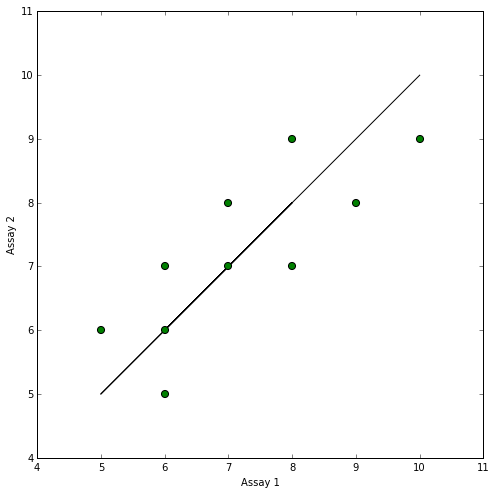

In [3]:
#Simple scatter plot
figure,(plt1) = pylab.subplots(1,1)
figure.set_size_inches(8,8)
#Add a line
plt1.plot(X,X,c='black',linewidth=1,zorder=1)
#add the points from our array
plt1.scatter(X,Y,c='green',label='test',zorder=2,s=50)
#labels
plt1.set_xlabel('Assay 1')
plt1.set_ylabel('Assay 2')

#To save the image:
# pylab.savefig('foo.png')

### Bar Charts

A more complex example. Here we are creating a bar chart plot of publication numbers retrieved from ChEMBL:

In [4]:
def barPlot(splt,desc,importances,caption):
    import numpy.numarray as na    
    labels = []
    weights = []
    threshold = sort([abs(w) for w in importances])[-11]
    for d in zip(desc,importances):
        if abs(d[1]) > threshold:
            labels.append(d[0])
            weights.append(d[1])
    
    xlocations = na.array(range(len(labels)))+0.5
    width = 0.8
    splt.bar(xlocations, weights, width=width)
    splt.set_xticks([r+1 for r in range(len(labels))])
    splt.set_xticklabels(labels, rotation='vertical')
    splt.set_xlim(0, xlocations[-1]+width*2)
    splt.set_title(caption)
    splt.get_xaxis().tick_bottom()
    splt.get_yaxis().tick_left()

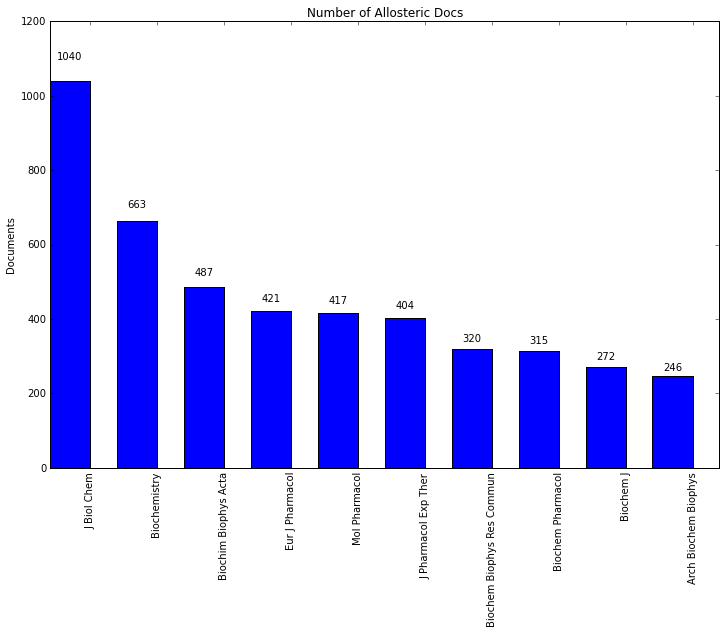

In [5]:
#set up our array and size
N = 10
Allosteric = (1040, 663, 487, 421, 417, 404, 320, 315, 272, 246)
ind = np.arange(N)  # the x locations for the groups
width = 0.6     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Allosteric, width, color='b')

# add some labels
ax.set_ylabel('Documents')
ax.set_title('Number of Allosteric Docs')
ax.set_xticks(ind+width)
ax.set_xticklabels(('J Biol Chem', 'Biochemistry', 'Biochim Biophys Acta',
                    'Eur J Pharmacol', 'Mol Pharmacol', 'J Pharmacol Exp Ther', 'Biochem Biophys Res Commun',
                    'Biochem Pharmacol', 'Biochem J', 'Arch Biochem Biophys') , rotation='vertical' )

def autolabel(rects):
    # attach the text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
fig.set_size_inches(12,8)

# write the figure to file
# pylab.savefig('all_docs.png')

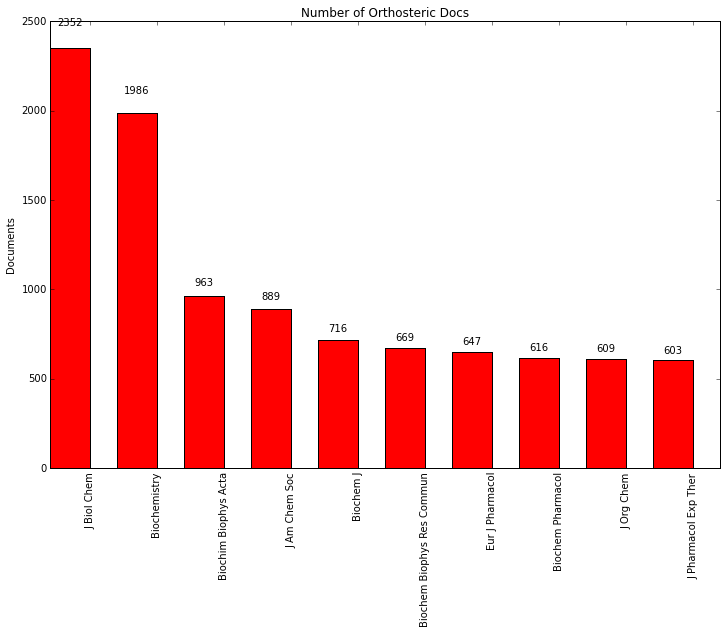

In [6]:
#Let's try again with a different series

N = 10
Orthosteric = (2352, 1986, 963, 889, 716, 669, 647, 616, 609, 603)

ind = np.arange(N)  # the x locations for the groups
width = 0.6     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Orthosteric, width, color='r')

# labels
ax.set_ylabel('Documents')
ax.set_title('Number of Orthosteric Docs')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('J Biol Chem' , 'Biochemistry' , 'Biochim Biophys Acta' , 'J Am Chem Soc' , 'Biochem J' , 'Biochem Biophys Res Commun' , 'Eur J Pharmacol' , 'Biochem Pharmacol' , 'J Org Chem' , 'J Pharmacol Exp Ther') , rotation='vertical' )

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
fig.set_size_inches(12,8)

#pylab.savefig('ort_docs.png')

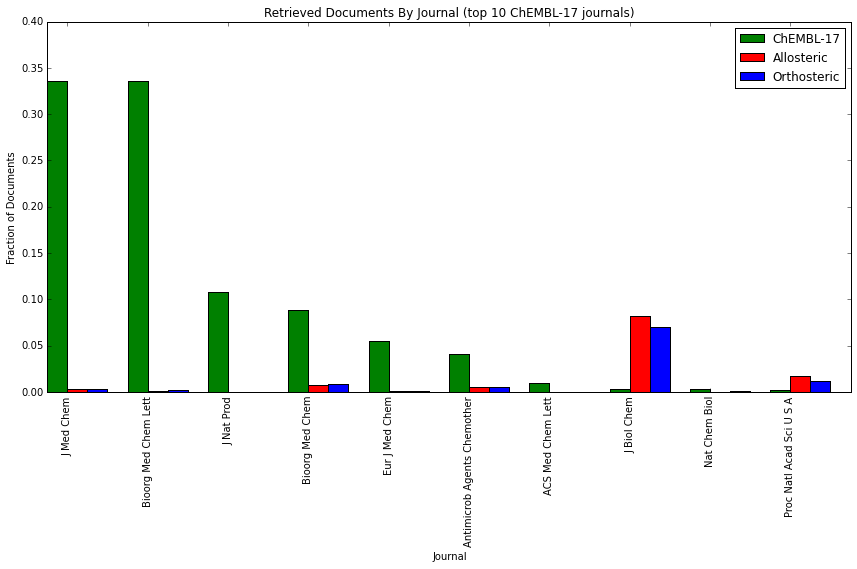

In [7]:
#now let's merge the two plots and add a third.

N = 10
Chembl = (0.33623, 0.33565, 0.10849, 0.088917, 0.054615, 0.041463, 0.0094829, 0.0033951, 0.0033171, 0.0020293)
Allosteric = (0.003473, 0.0010261, 0.00015787, 0.0074197, 0.0014208, 0.0049728, 0.0004736, 0.08209, 0.0004736, 0.017444)
Orthosteric = (0.0031638, 0.0024773, 0.00035817, 0.0082378, 0.001164, 0.0051039, 0.00044771, 0.070201, 0.00080587, 0.012088)

ind = np.arange(N)  # the x locations for the groups
width = 0.25     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Chembl, width, color='g')
rects2 = ax.bar(ind+width, Allosteric, width, color='r')
rects3 = ax.bar(ind+2*width, Orthosteric, width, color='b')


ax.set_ylabel('Fraction of Documents')
ax.set_xlabel('Journal')
ax.set_title('Retrieved Documents By Journal (top 10 ChEMBL-17 journals)')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('J Med Chem' , 'Bioorg Med Chem Lett' , 'J Nat Prod' , 'Bioorg Med Chem' , 'Eur J Med Chem' , 'Antimicrob Agents Chemother' , 'ACS Med Chem Lett' , 'J Biol Chem' , 'Nat Chem Biol' , 'Proc Natl Acad Sci U S A' ) , rotation='vertical' )
ax.set_ylim(0., 0.4)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('ChEMBL-17', 'Allosteric', 'Orthosteric') )

fig.set_size_inches(12,8)
plt.tight_layout()

#plt.savefig('combined_docs_chembl_freq.png' , dpi=300)

### Heat Maps

The heatmap will be calculated on a correlation matrix I calculated on a subset of ChEMBL-17 (protein binding compounds from paper primary assays, approximately 500,000 compounds)

In [8]:
#First we read the data
data = pd.read_csv('physchem_props_heatmap.csv')
data = data.drop('Property',1) #drop the line header column
data.head()

,CMP_ATOMCOUNT_Br,CMP_ATOMCOUNT_C,CMP_ATOMCOUNT_C_sp,CMP_ATOMCOUNT_C_sp2,CMP_ATOMCOUNT_C_sp3,CMP_ATOMCOUNT_Cl,CMP_ATOMCOUNT_F,CMP_ATOMCOUNT_H,CMP_ATOMCOUNT_H_ACCEPTORS,CMP_ATOMCOUNT_H_DONORS,...,CMP_NUM_CHAINASSEMBLIES,CMP_NUM_CHAINS,CMP_NUM_HYDROGENBONS,CMP_NUM_RINGASSEMBLIES,CMP_NUM_RINGS,CMP_NUM_RO5_VIOLATIONS,CMP_NUM_TERMINALROTOMERS,CMP_RIGIDITY_INDEX,CMP_RO3_PASS,CMP_SOLUBILITY
0,1.000000,-0.048913,-0.003267,-0.002560,-0.067634,-0.030312,-0.030254,-0.064898,-0.045986,-0.034689,...,0.033604,-0.023316,0,-0.025284,-0.025694,0.014171,-0.037430,0.044424,-0.009988,-0.042426
1,-0.048913,1.000000,-0.011731,0.732523,0.830759,-0.045839,0.034145,0.937193,0.731083,0.751609,...,0.440113,0.849506,0,0.548467,0.547757,0.642066,0.311307,-0.258413,-0.194959,-0.735655
2,-0.003267,-0.011731,1.000000,-0.025398,-0.040720,-0.011762,0.002928,-0.047616,-0.018094,-0.045710,...,0.009287,-0.027206,0,-0.001452,-0.021418,-0.032392,-0.033084,0.023005,-0.001326,-0.023064
3,-0.002560,0.732523,-0.025398,1.000000,0.230850,0.041625,0.092989,0.474655,0.452491,0.449132,...,0.344916,0.522583,0,0.653083,0.610555,0.467887,0.180122,0.214346,-0.191599,-0.686580
4,-0.067634,0.830759,-0.040720,0.230850,1.000000,-0.098947,-0.027296,0.953238,0.675599,0.708896,...,0.346588,0.787927,0,0.250178,0.284788,0.536506,0.299069,-0.545165,-0.121960,-0.489116


In [9]:
#create an array that will serve as column legend later
columns = list(data.columns)
print columns

['CMP_ATOMCOUNT_Br', 'CMP_ATOMCOUNT_C', 'CMP_ATOMCOUNT_C_sp', 'CMP_ATOMCOUNT_C_sp2', 'CMP_ATOMCOUNT_C_sp3', 'CMP_ATOMCOUNT_Cl', 'CMP_ATOMCOUNT_F', 'CMP_ATOMCOUNT_H', 'CMP_ATOMCOUNT_H_ACCEPTORS', 'CMP_ATOMCOUNT_H_DONORS', 'CMP_ATOMCOUNT_HALOGENS', 'CMP_ATOMCOUNT_HEAVY', 'CMP_ATOMCOUNT_HYDROGENS', 'CMP_ATOMCOUNT_I', 'CMP_ATOMCOUNT_METALATOMS', 'CMP_ATOMCOUNT_N', 'CMP_ATOMCOUNT_NEGATIVE', 'CMP_ATOMCOUNT_O', 'CMP_ATOMCOUNT_P', 'CMP_ATOMCOUNT_POSITIVE', 'CMP_ATOMCOUNT_S', 'CMP_ATOMCOUNT_TOTAL', 'CMP_ATOMS_C_FRAC', 'CMP_ATOMS_C_sp_FRAC', 'CMP_ATOMS_C_sp2_FRAC', 'CMP_ATOMS_C_sp3_FRAC', 'CMP_ATOMS_H_ACCEPTOR_FRAC', 'CMP_ATOMS_H_DONOR_FRAC', 'CMP_ATOMS_H_FRAC', 'CMP_ATOMS_HALOGEN_FRAC', 'CMP_ATOMS_HETEROATOM_FRAC', 'CMP_ATOMS_N_FRAC', 'CMP_ATOMS_NEGATIVE_FRAC', 'CMP_ATOMS_O_FRAC', 'CMP_ATOMS_OTHER_FRAC', 'CMP_ATOMS_P_FRAC', 'CMP_ATOMS_POSITIVE_FRAC', 'CMP_ATOMS_S_FRAC', 'CMP_ATOMS_STEROATOM_FRAC', 'CMP_BONDS_ALIPHATIC_FRAC', 'CMP_BONDS_AROMATIC', 'CMP_BONDS_AROMATIC_FRAC', 'CMP_BONDS_BRIDGE', '

In [10]:
#create an array that will serve as row legend later
rows = columns

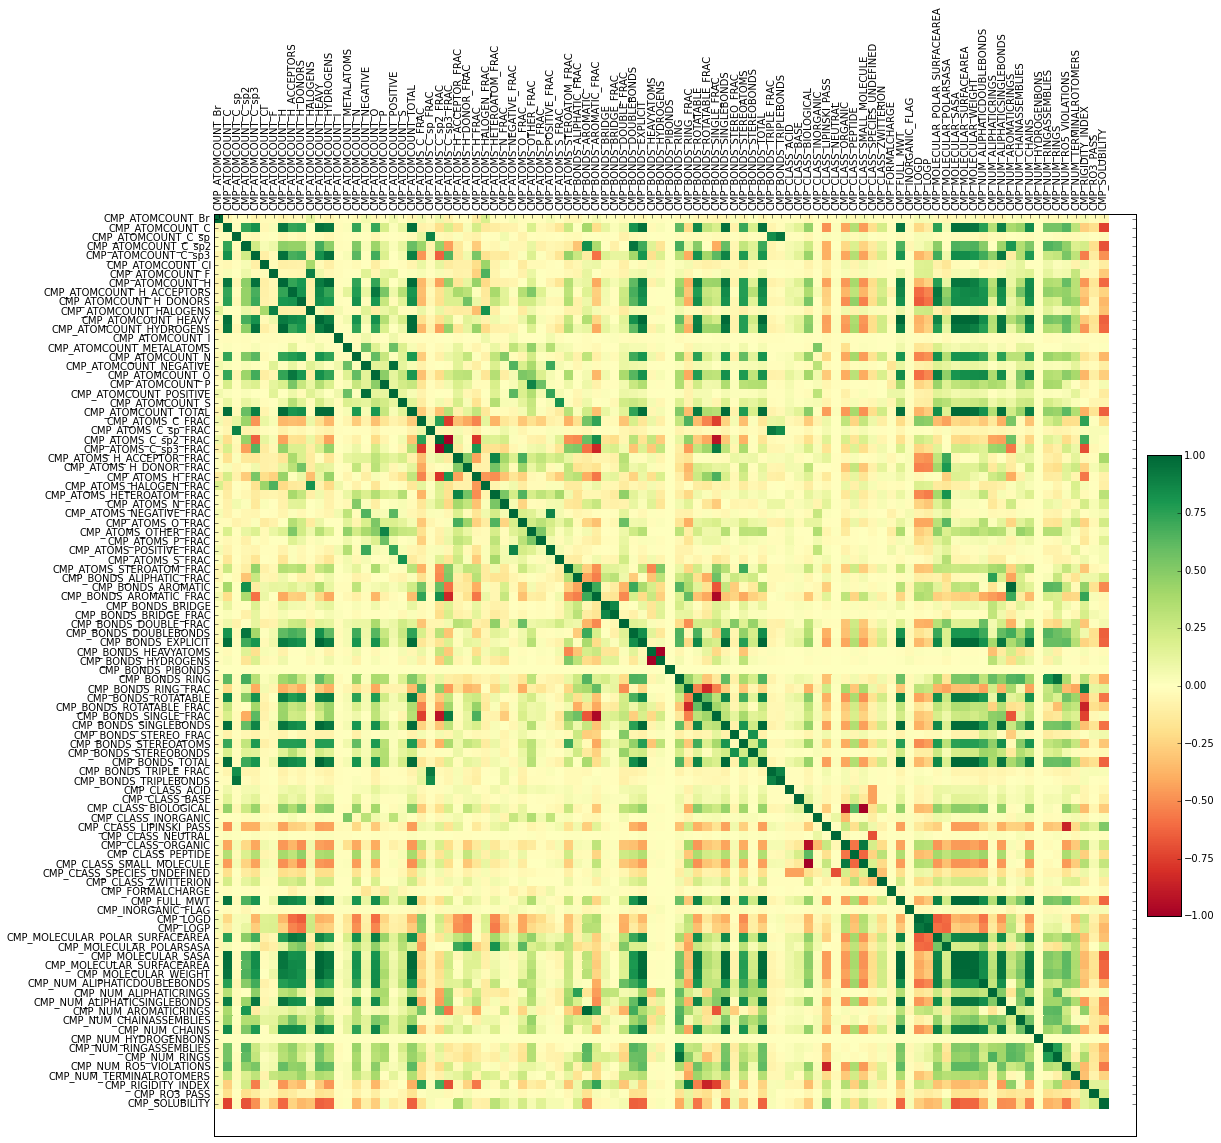

In [11]:
#data + initialization
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)

#color scale legend
cax = fig.add_axes([1.0, 0.2, 0.03, 0.4])
cbar = plt.colorbar(heatmap,cax)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(rows, minor=False, rotation='vertical')
ax.set_yticklabels(columns, minor=False)

plt.tight_layout()

#save the figure
#plt.savefig('heatmap.png', dpi=300)

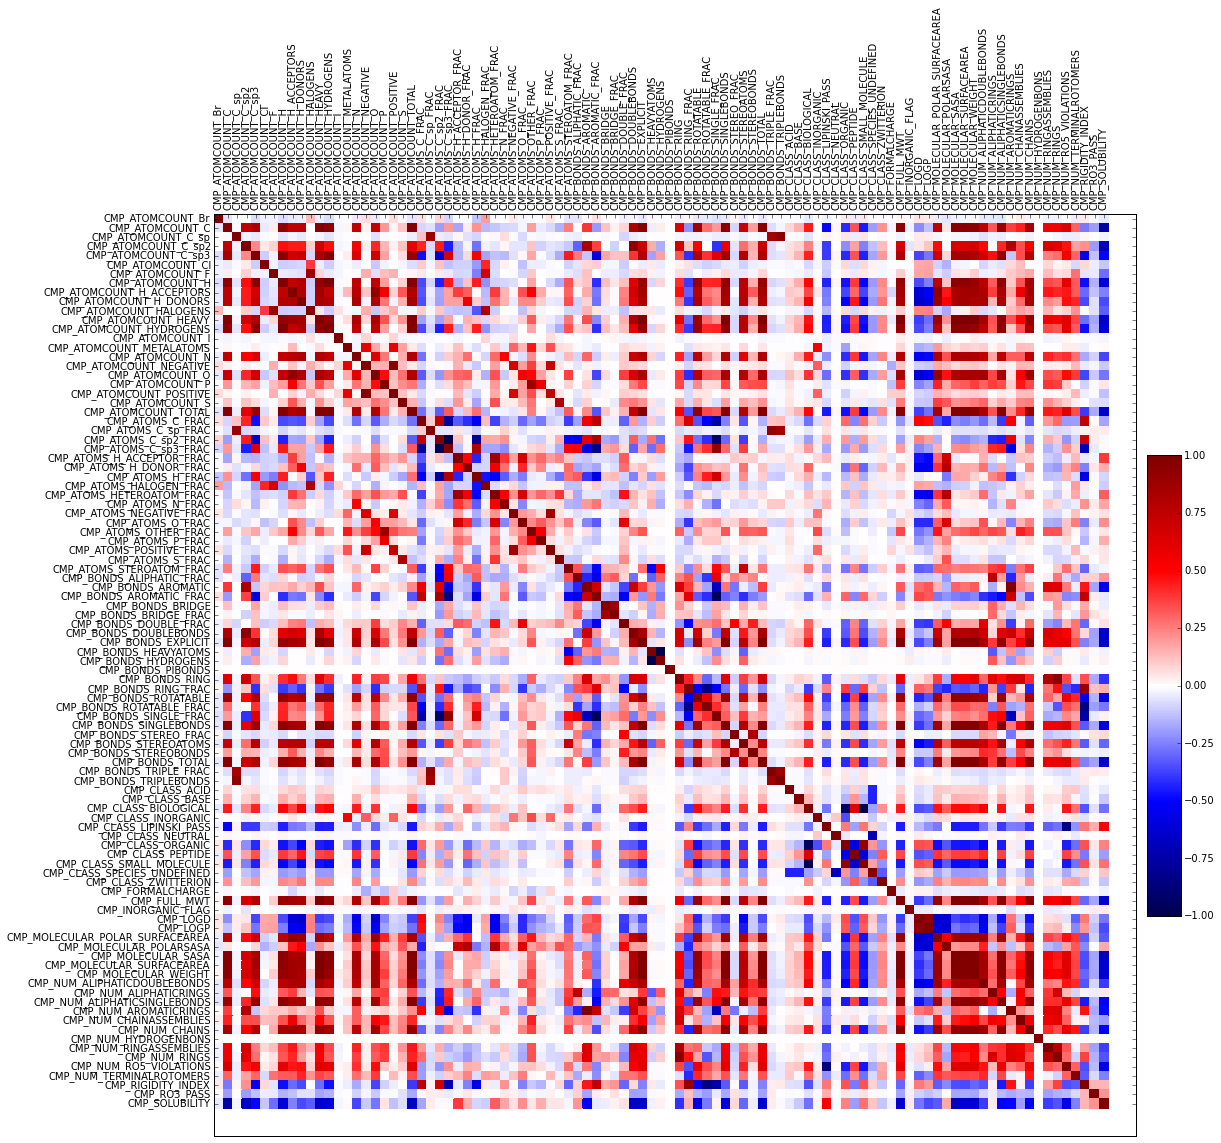

In [12]:
#Let's try it again with a different color schema
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
heatmap = ax.pcolor(data, cmap=plt.cm.seismic)

#legend
cax = fig.add_axes([1.0, 0.2, 0.03, 0.4])
cbar = plt.colorbar(heatmap,cax)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

#layout
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(rows, minor=False, rotation='vertical')
ax.set_yticklabels(columns, minor=False)


plt.tight_layout()

#save the figure
#plt.savefig('heatmap2.png', dpi=300)